<a href="https://colab.research.google.com/github/yingzibu/PBPK/blob/main/f2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This model independent method is most suitable for dissolution profile comparison when three to four or more dissolution time points are available. As further suggestions for the general approach, the following recommendations should also be considered:


*   The dissolution measurements of the test and reference batches should be made under exactly the same conditions. The dissolution time points for both the profiles should be the same (e.g., 15, 30, 45, 60 minutes). The reference batch used should be the most recently manufactured prechange product.
*   Only one measurement should be considered after 85% dissolution of both the products.
*   To allow use of mean data, the percent coefficient of variation at the earlier time points (e.g. 15 minutes) should not be more than 20% and at other time points should not be more than 10%.
*   The mean dissolution values for $R_t$ can be derived either from (1) last prechange (reference) batch or (2) last two or more consecutively manufactured prechange batches.

### Model independent approach using a similarity factor

The similarity factor ($f_2$) is a logarithmic reciprocal square root transformation of the sum of squared error and is a measurement of the similarity in the percent (%) dissolution between the two curves

\begin{equation}
f_2 = 50  \log \left\{ [1 + \frac{1}{n} \sum_{t=1}^n (R_t - T_t)^2]^{-0.5} \times 100
 \right\}
\end{equation}

In [4]:
import pandas as pd
data_df = pd.DataFrame()
data_df['t'] = pd.DataFrame([2,3,4,6,8,10])   # time
data_df['R'] = pd.DataFrame([1,53,73,91,97,98]) # reference
data_df['T'] = pd.DataFrame([1,37,56,77,88, 93]) # test
data_df

,t,R,T
0,2,1,1
1,3,53,37
2,4,73,56
3,6,91,77
4,8,97,88
5,10,98,93


In [5]:
# probably using list is better?
t = [2,3,4,6,8,10]
R = [1,53,73,91,97,98]
T = [1,37,56,77,88, 93]

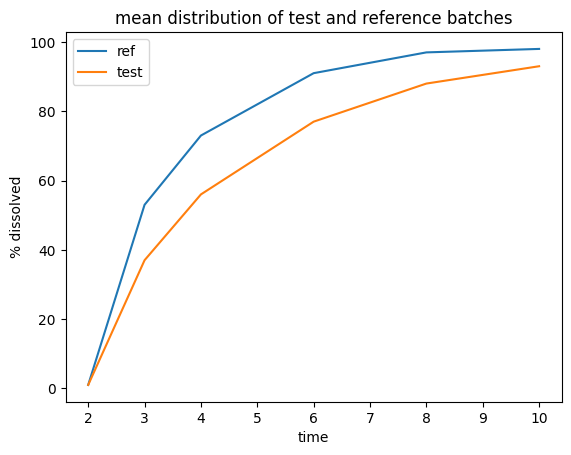

In [10]:
import matplotlib.pyplot as plt
plt.plot(t, R, label='ref')
plt.plot(t, T, label='test')
plt.xlabel('time'); plt.ylabel('% dissolved')
plt.title('mean distribution of test and reference batches')
plt.legend(); plt.show(); plt.close()

In [20]:
import numpy as np

def cal_f2(R:list, T:list):
    assert len(R) == len(T)
    num_here = len(R)
    sum_diff_square = 0
    for i, j in zip(R, T):
        temp = (i - j) ** 2
        sum_diff_square += temp
    f2 = sum_diff_square / num_here + 1
    f2 = f2 ** (-0.5) * 100
    f2 = 50 * np.log10(f2) # BE careful, np.log is ln, np.log10 is used here
    print('F2 calculated for Reference and Test: ')
    return f2


cal_f2(R, T)

F2 calculated for Reference and Test: 


46.18005548040301

### f1 calculation
\begin{equation}
    f_1 = \frac{\sum_{t=1}^n |R_t - T_t|}{\sum_{t=1}^n R_t} \times 100
\end{equation}

In [23]:
def cal_f1(R:list, T:list):
    assert len(R) == len(T)
    sum_diff = 0
    sum_R = 0
    for i, j in zip(R, T):
        diff = np.abs(i-j)
        sum_diff += diff
        sum_R += i
    f1 = sum_diff / sum_R * 100
    print('F1 calculated for Reference and Test: ')
    return f1

cal_f1(R, T)

F1 calculated for Reference and Test: 


14.769975786924938

1. Determine the dissolution profile of two products (12 units each) of the test (postchange) and reference (prechange) products
2. Using the **mean** dissolution values from both curves at each time interval, calculate the difference factor (f1) and similarity factor (f2).
3. For curves to be considered similar, f1 values should be close to 0, and f2 values should be close to 100. Generally, f1 values up to 15 (0-15) and f2 values greater than 50 (50-100) ensure sameness or equivalence of the two curves and, thus, of the performance of the test (postchange) and reference (prechange) products




Understandable since f1: smaller, better (0-15 cutoff); f2: larger, better (50-100 cutoff)